# *Challenge 1*: A **kernel** methods / **DL** pipeline for the FashionMNIST dataset

Advanced Topics in Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/notebooks/AdvML_Challenge_1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


In [2]:
#Load libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

During this first *challenge* of the *Advanced Machine Learning Course*, you will experiment with the development of a data analysis pipeline based upon various techniques seen during the lectures so far: some **unsupervised** (*e.g.* *PCA*, *kernel-PCA*) and some others **supervised** (*e.g.* *kernel SVM* and *Artificial Neural Networks* for classification).

### The dataset

The dataset of interest for the *challenge* will be [*FashionMNIST*](https://github.com/zalandoresearch/fashion-mnist), an *MNIST*-like dataset of grayscale images of fashion items. Originally developed by Zalando Research in 2017 as a harder (yet *drop-in* compatible) replacement for the original *MNIST* dataset, it has been used in several papers and competitions since then.

Remember to consider the *dataset* mentioned below as the **training set** offered by *FashionMNIST*. Use the *test set* only at the end, to evaluate the overall accuracy of the pipeline!

In [9]:
# Load the Fashion MNIST dataset
from torchvision import datasets, transforms
train_data = datasets.FashionMNIST('data', train=True, download=True, transform=transforms.ToTensor())
# select only 30000 images randomly with the respective labels
idx = np.random.choice(60000, 30000, replace=False)
train_data.data = train_data.data[idx]
train_data.targets = train_data.targets[idx]


In [ ]:
train_data[1]

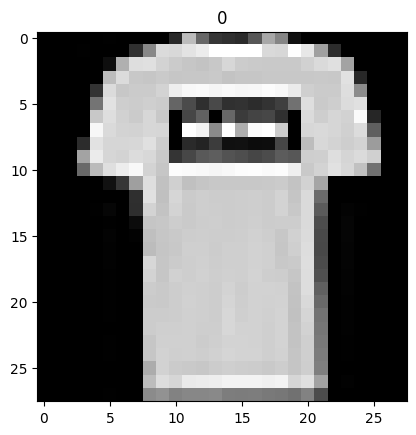

In [3]:
#Define function to show image with the label
def show_image(data_point):
    label = data_point[1]
    plt.imshow(data_point[0].view(28,28), cmap='gray')
    plt.title(label)
    plt.show()


#Show image
show_image(train_data[1])

### Section 1: Understanding data geometry

Load the dataset in the most suitable form for the tasks that follow. Then, perform the following steps, with the goal of developing a geometric understanding of the dataset:

1. Perform a (linear) *PCA* on the dataset, and plot the first two (or three!) principal components along with the true label. Comment on data separation.

2. Perform a *kernel-PCA* on the dataset with a Gaussian kernel, and plot the first two (or three!) principal components along with the true label. Try to tune the dispersion parameter of the kernel to obtain a good separation of the data. Comment.

3. Perform another *kernel-PCA* on the dataset with another kernel of your own choice, and plot the first two (or three!) principal components along with the true label. Try to tune the degree of the polynomial kernel to obtain a good separation of the data. Comment.

Whenever suitable, try to complement your analysis with some graphs!

### __Load Data__ 

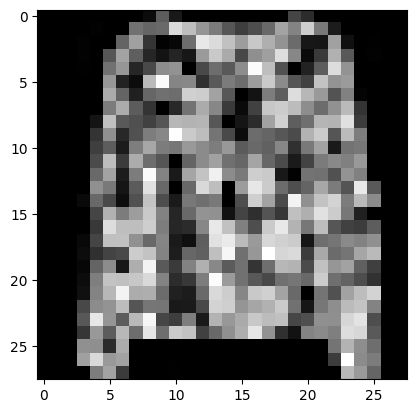

In [10]:
# Convert the all the training data into a numpy array
train_data_np = np.array([data[0].numpy() for data in train_data])
labels_np = np.array([data[1] for data in train_data])

# Reshape the numpy array to 2D
train_data_np = train_data_np.reshape(train_data_np.shape[0], -1)
plt.imshow(train_data_np[1].reshape(28,28), cmap='gray')

### __Linear PCA__ 

Perform PCA:

In [11]:
# Perform PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(train_data_np)

# Transform the data
train_data_pca = pca.transform(train_data_np)

Explore the data:

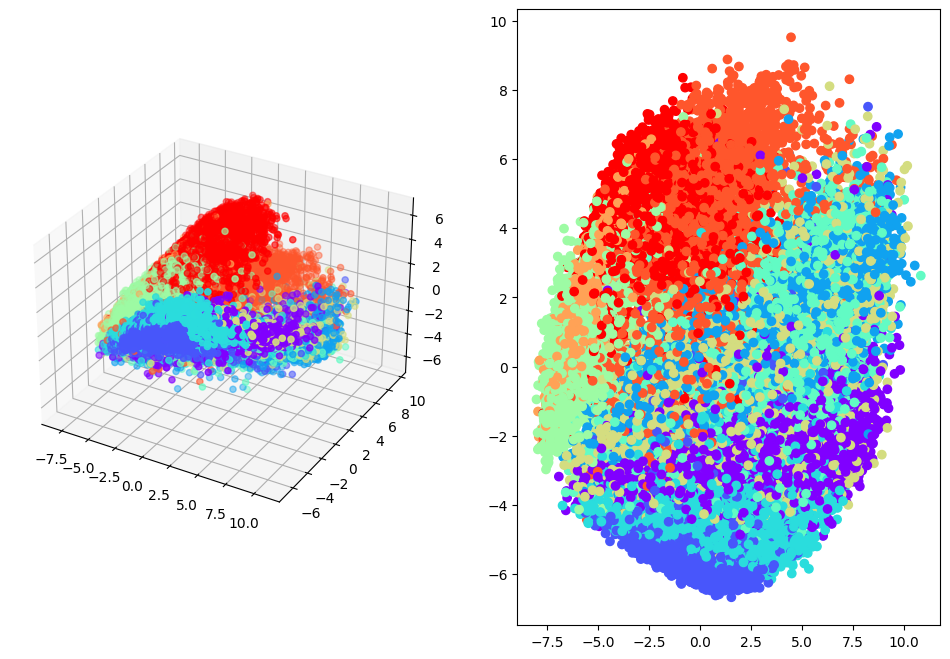

In [12]:
# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_pca[:,0], train_data_pca[:,1], train_data_pca[:,2], c=labels_np, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_pca[:,0], train_data_pca[:,1], c=labels_np, cmap='rainbow')
plt.show()


A more interactive plot:

In [ ]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_pca[:,0], y=train_data_pca[:,1], z=train_data_pca[:,2], mode='markers', marker=dict(size=2, color=labels_np, colorscale='rainbow', opacity=0.8))])
fig.show()


### __Kernel PCA__ 

In [7]:
# Perform PCA with gaussian kernel
from sklearn.decomposition import KernelPCA
# select random 40000 samples  and labels from the training data to reduce the computation time
random_indices = np.random.choice(train_data_np.shape[0], 10000)
limited_train_data, limited_labels = train_data_np[random_indices], labels_np[random_indices]

kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.085)
train_data_kpca = kpca.fit_transform(limited_train_data)

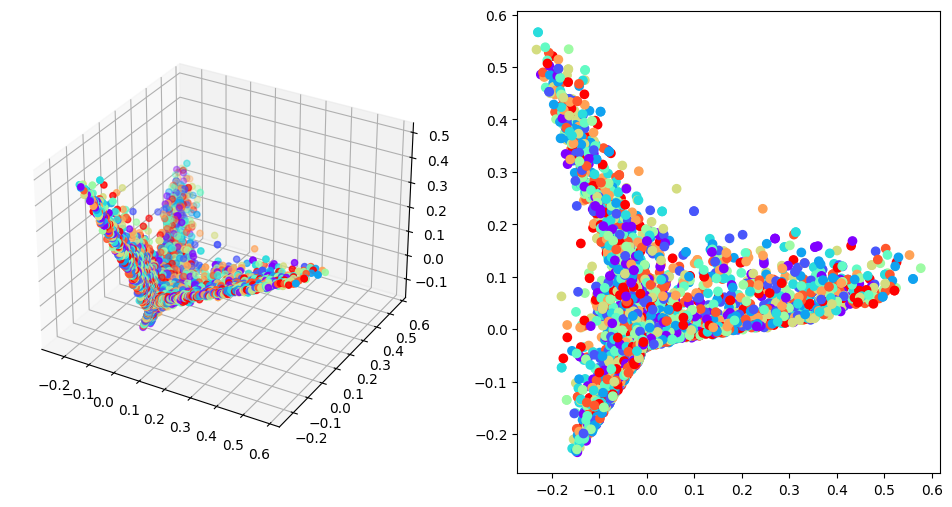

In [8]:
# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], train_data_kpca[:,2], c=limited_labels, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], c=limited_labels, cmap='rainbow')
plt.show()

In [93]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_kpca[:,0], y=train_data_kpca[:,1], z=train_data_kpca[:,2], mode='markers', marker=dict(size=2, color=limited_labels, colorscale='rainbow', opacity=0.8))])
fig.show()

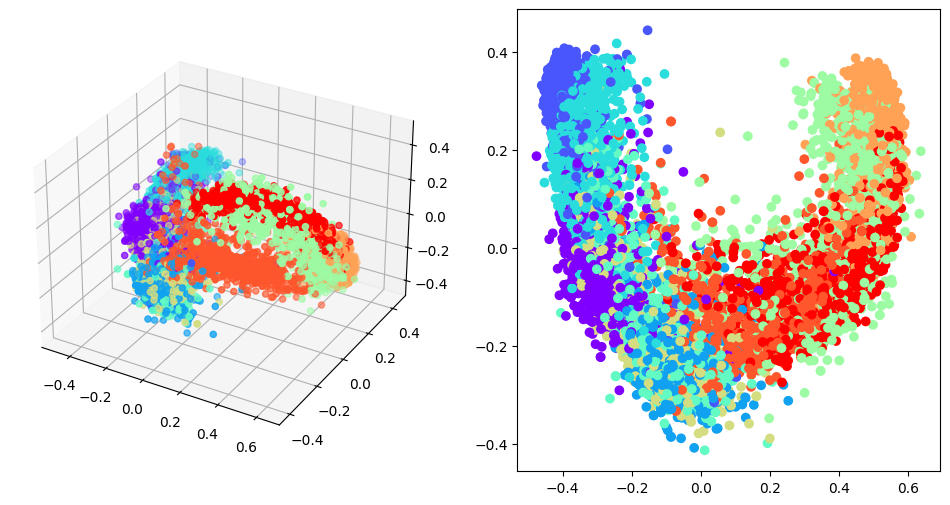

In [96]:
# try other kernels
from sklearn.decomposition import KernelPCA
# select random 40000 samples  and labels from the training data to reduce the computation time
random_indices = np.random.choice(train_data_np.shape[0], 10000)
limited_train_data, limited_labels = train_data_np[random_indices], labels_np[random_indices]

kpca = KernelPCA(n_components=3, kernel='cosine', gamma=0.08)
train_data_kpca = kpca.fit_transform(limited_train_data)

# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], train_data_kpca[:,2], c=limited_labels, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], c=limited_labels, cmap='rainbow')
plt.show()


In [95]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_kpca[:,0], y=train_data_kpca[:,1], z=train_data_kpca[:,2], mode='markers', marker=dict(size=2, color=limited_labels, colorscale='rainbow', opacity=0.8))])
fig.show()

### Section 2: Bridging *unsupervised* and *supervised*

Choose one of the results obtained in the previous section (you should choose the one better explaining data geometry), and ignore the true labels. Then, perform the following steps:

1. Considering only the first $10$ components of the *(kernel-)PCA* and try to assign $10$ labels to the resulting datapoints. Choose the approach you deem most suitable. Comment on the results, by considering:
    
    a. How well does the label-assignment just performed reflect the true labels?

    b. Does the number of components used ($10$) reflect the actual *knee-* or *gap-* *point* of the spectrum associated to the principal components?

Whenever suitable, try to complement your analysis with some graphs!

### Section 3: (Supervised) classification

Consider the dataset composed of the original images, with the label assigned in the previous section (regardless of its actual match with the true label!). Then, define and learn a classifier that can predict the label of a new image. Speficically:

1. Learn a *kernel-SVM* on the data/label pairs. The choice of the kernel and its hyperparameters is up to your experimentation and time availability. Comment on your choices and results.

2. Learn a *fully-connected NN* on the data/label pairs. The choice of the architecture and its hyperparameters is up to your experimentation and time availability: show at least two different hyperparameter configurations, and comment on the results.

3. Learn a *CNN* on the data/label pairs. The choice of the architecture and its hyperparameters is up to your experimentation and time availability. Comment on the results with special respect to the FCN architecture.

### Section 4: Wrap-up!

Evaluate the overall accuracy of the pipeline on the *test set* of *FashionMNIST*. *I.e.* compare the predicted labels from the three classifiers built in *Section 3* with the true labels.

In order to assign a true label *name* (e.g. *trousers*, *sandal*, ...) to those determined just from *(kernel-)PCA* (that obviously carry no direct information about the subject of the picture), you can either:

i. *Cheat* and use the most abundant labels for each group of *(kernel-)PCA-labelled* datapoints.

ii. Sample a subset of datapoints from each *(kernel-)PCA-labelled* class, and assign one label by direct visual inspection. If you choose this route, it may also serve as a reminder of the fact that *expert labelling* is not always a trivial (and almost never a fast) task!

Comment on the results obtained.

### Section 5: A *fully-supervised* approach

Repeat the steps of *Section 3* using the true labels of the dataset. Comment on the results, and draw a comparison between such results and those obtained from the previous *hybrid* pipeline.


And please, avoid doing that... 👇🏻

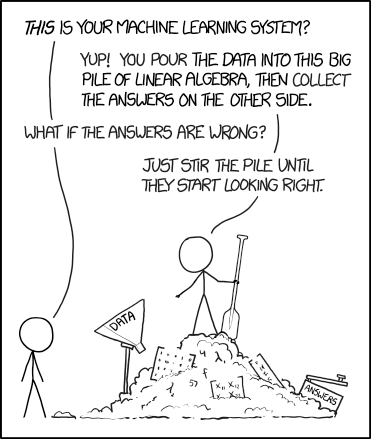